In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d yasserh/titanic-dataset

  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 16.4MB/s]


In [5]:
import pandas as pd
import numpy as np
import zipfile
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
z = zipfile.ZipFile('titanic-dataset.zip', 'r')
z.extractall()

In [7]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Описание столбцов датасета Titanic
#Survived выжил(1-да,0-нет)
#Pclass Класск руиза
#Name ФИО
#Sex Пол
#Age Возраст
#SibSp число братьев,сестер или супругов на борту у человека
#Parch количество родителей или детей,с которыми путешествовал каждый пассажир
#Ticket Номер билета
#Fare Цена билета
#Cabin Номер каюты
#Embarked Порт посадки

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Количество пустых значений по столбцам
# Age - 177, т.к. это число заполним средним значением
# Cabin - 687, заполним через метод, хотя при таком количестве пропусков его было бы правильнее удалить
# Embarked - 2, заполним через метод

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna(method = 'ffill')
df['Embarked'] = df['Embarked'].fillna(method = 'ffill')
df['Cabin'] = df['Cabin'].fillna('C0')

In [13]:
df.isnull().sum().sum()

0

In [14]:
#теперь пустых ячеек в датасете нет

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-16-1f8db7c938a8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)


<Axes: >

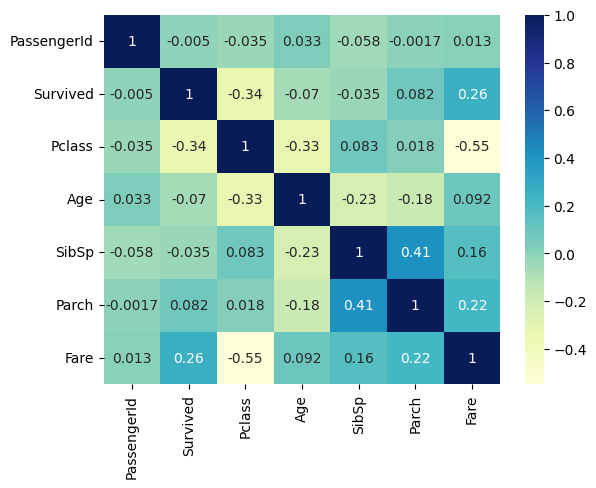

In [16]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

([<matplotlib.axis.XTick at 0x7d0c2ad42650>,
 [Text(0, 0, 'Невыжившие'), Text(1, 0, 'Выжившие')])

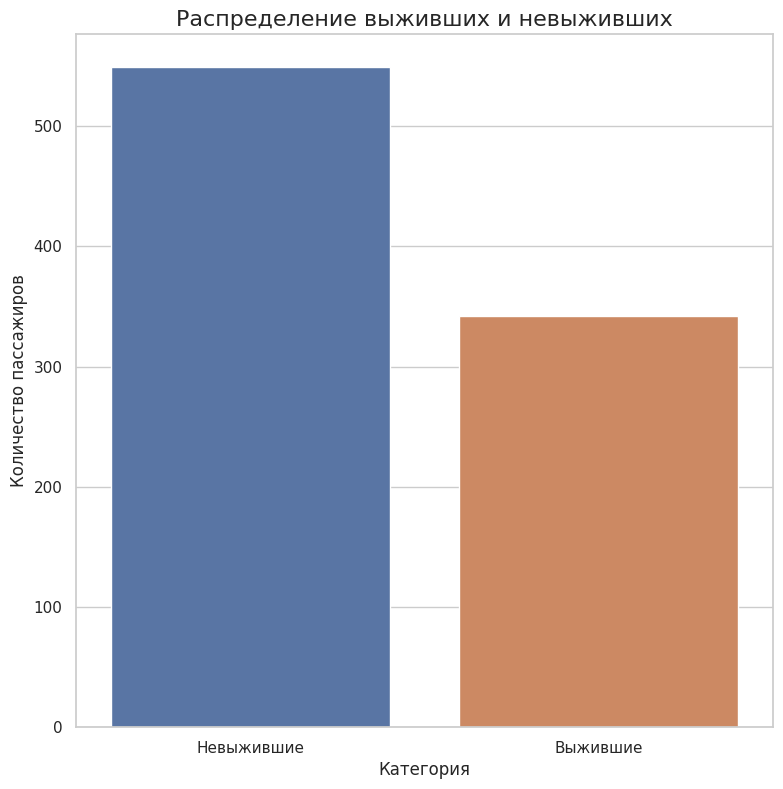

In [17]:
plt.figure(figsize=(9,9))
sns.set_theme(style="whitegrid")
sns.countplot(x='Survived', data=df)
plt.title("Распределение выживших и невыживших", fontsize=16)
plt.xlabel("Категория")
plt.ylabel("Количество пассажиров")
plt.xticks(np.arange(2), ['Невыжившие', 'Выжившие'])

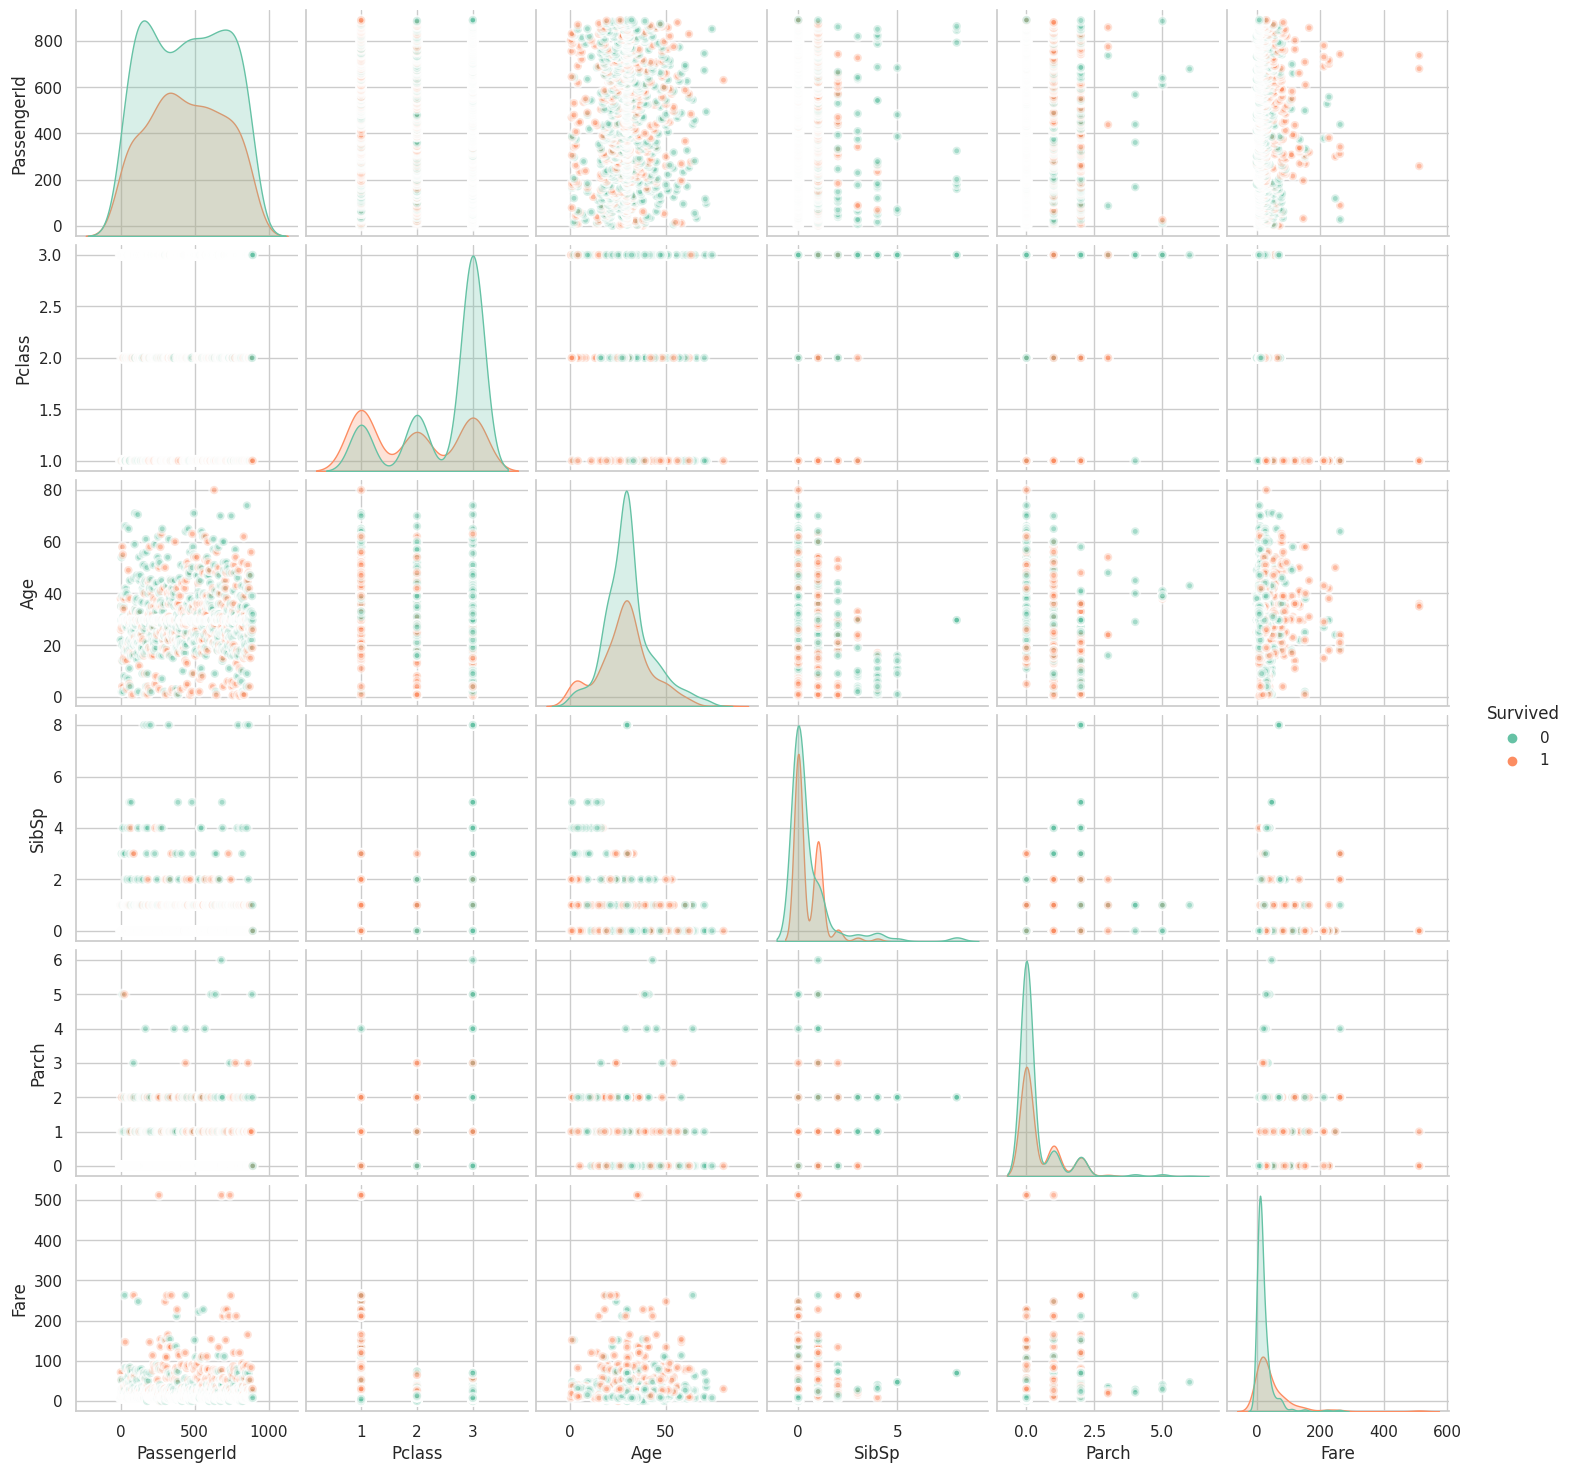

In [18]:
sns.pairplot(df, hue='Survived', palette='Set2', plot_kws=dict(linewidth=2.5, alpha=0.6))

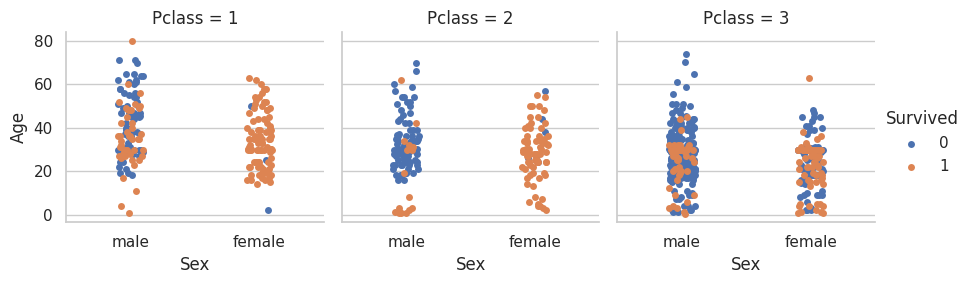

In [19]:
g = sns.FacetGrid(df, col='Pclass', hue='Survived')
g = g.map(sns.stripplot, 'Sex', 'Age', order=["male", "female"], hue_order=[0, 1]).add_legend()

In [20]:
multi_gr = df.groupby(['Pclass', 'Sex']).Survived.mean()
multi_gr.unstack(level=1)

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [21]:
#Класс и Пол пассажиров влияет на выжываемость. Так выживаемость среди женщин 1 и 2 классов составила более 90%

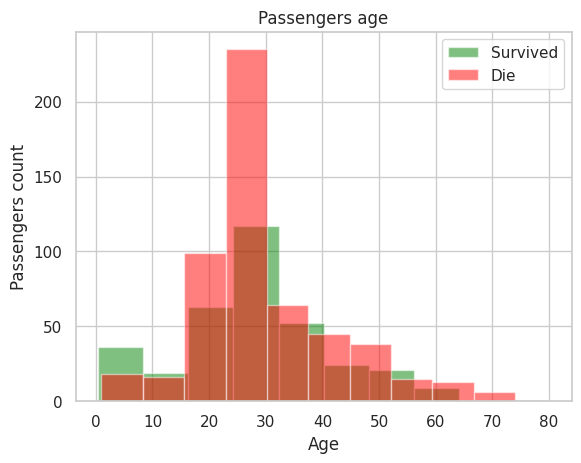

In [22]:
df[df['Survived'] == 1]['Age'].hist(color="green",
                                         label='Survived', alpha=0.5)
df[df['Survived'] == 0]['Age'].hist(color="red",
                                         label='Die', alpha=0.5)
plt.title('Passengers age')
plt.xlabel('Age')
plt.ylabel('Passengers count')
plt.legend()

In [23]:
#Среди детей выживаемость больше. Родители хотели спасти своих детей, даже ценой своей жизни

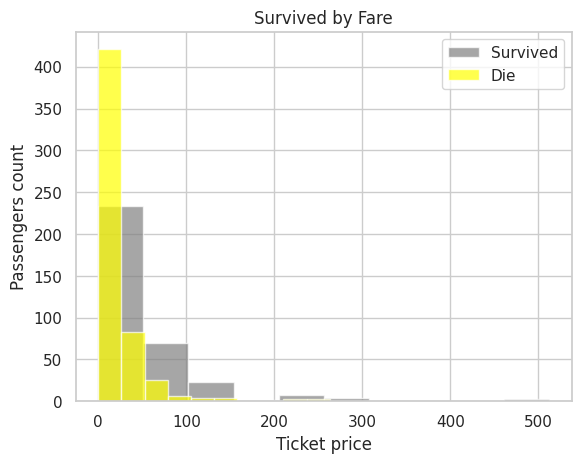

In [24]:
df[df['Survived'] == 1]['Fare'].hist(color="grey",
                                         label='Survived', alpha=0.7)
df[df['Survived'] == 0]['Fare'].hist(color="yellow",
                                         label='Die', alpha=0.7)
plt.title('Survived by Fare')
plt.xlabel('Ticket price')
plt.ylabel('Passengers count')
plt.legend()

In [25]:
df['Embarked'].value_counts()

S    644
C    169
Q     78
Name: Embarked, dtype: int64

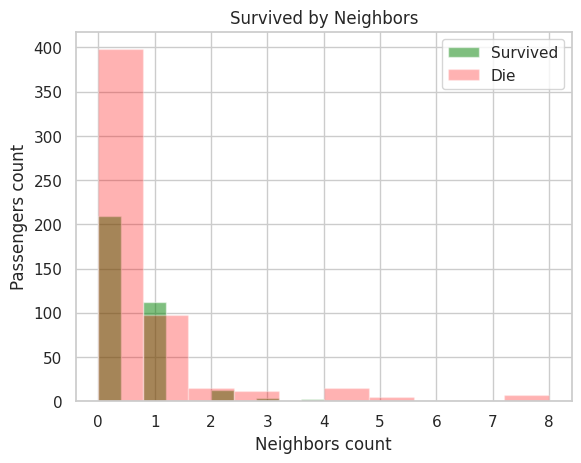

In [30]:
df[df['Survived'] == 1]['SibSp'].hist(color="green",
                                         label='Survived', alpha=0.5)
df[df['Survived'] == 0]['SibSp'].hist(color="red",
                                         label='Die', alpha=0.3)
plt.title('Survived by Neighbors')
plt.xlabel('Neighbors count')
plt.ylabel('Passengers count')
plt.legend()

In [31]:
#Выживаемость больше среди одиночек

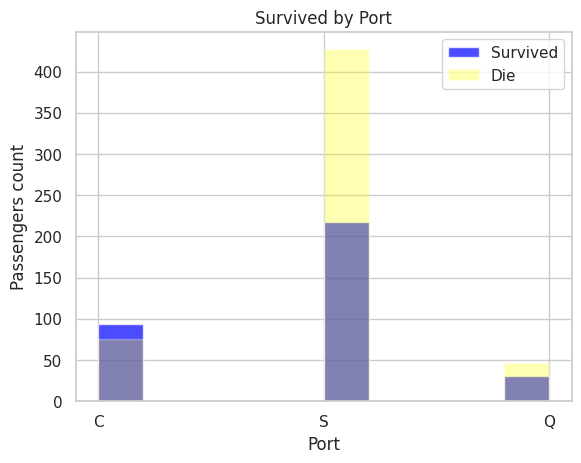

In [32]:
df[df['Survived'] == 1]['Embarked'].hist(color="blue",
                                         label='Survived', alpha=0.7)
df[df['Survived'] == 0]['Embarked'].hist(color="yellow",
                                         label='Die', alpha=0.3)
plt.title('Survived by Port')
plt.xlabel('Port')
plt.ylabel('Passengers count')
plt.legend()

In [27]:
#Нельзя однозначно утверждать повлиял ли порт посадки на выживаемость

In [28]:
df2 = df[(df['Name'].str.contains('Henry', case=False, na=False).astype(int)==1)]
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,C123,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,C83,S
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.5500,C2,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,29.699118,3,1,4133,25.4667,A7,S
209,210,1,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,A31,C
212,213,0,3,"Perkin, Mr. John Henry",male,22.000000,0,0,A/5 21174,7.2500,A31,S
222,223,0,3,"Green, Mr. George Henry",male,51.000000,0,0,21440,8.0500,D15,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.500000,0,0,A/5 21173,7.2500,C93,S


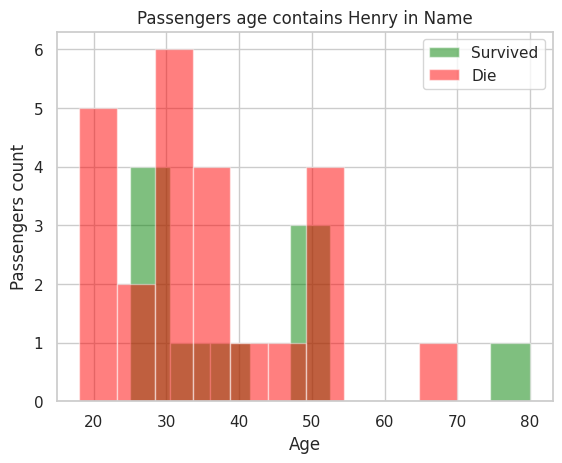

In [29]:
df2[df2['Survived'] == 1]['Age'].hist(color="green",
                                         label='Survived', alpha=0.5)
df2[df2['Survived'] == 0]['Age'].hist(color="red",
                                         label='Die', alpha=0.5)
plt.title('Passengers age contains Henry in Name')
plt.xlabel('Age')
plt.ylabel('Passengers count')
plt.legend()

In [33]:
#Нельзя однозначно утверждать что имя влияет на выживаемость